In [1]:
from TreeCluster_bestcluster import *

In [157]:
len(run_TreeCluster(3.99997999999, tree_file, threshold_free, 'max', support))

33

In [71]:
tree_file="phylogeny.nwk"
threshold_free=None
method='avg_clade'
support=float('-inf')
n_clust= 1000
initvalue=2
coarsevalue=3
finevalue=4

In [3]:
val = (return_best_cluster(initvalue,coarsevalue,finevalue,n_clust,tree_file,threshold_free,method,support)[1])

REAL ITER: 1  Loss:  20  Threshold_val: 0.08733139019029297
REAL ITER: 2  Loss:  665  Threshold_val: 0.19917510167480834


In [56]:
import matplotlib.pyplot as plt
def plot_method(max_val,method):
    pts=[]
    i=0
    while i<=2*max_val:
        i += (max_val)/60
        pts.append(i)
    n_clust_pts=[]
    for i in pts:
        n_clust_pts.append(len(run_TreeCluster(i, tree_file, threshold_free, method, support)))    
    plt.xlabel('threshold distance')
    plt.ylabel('number of clusters')
    plt.title(method)
    plt.plot(pts, n_clust_pts,'ro',pts, n_clust_pts,'b')
    plt.show()

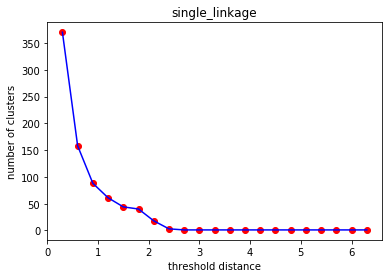

In [43]:
plot_method(3,'single_linkage')

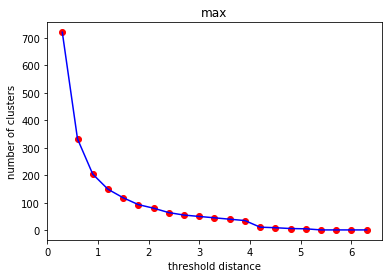

In [44]:
plot_method(3,'max')

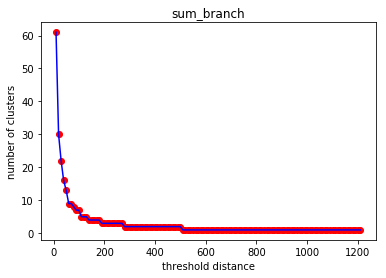

In [57]:
plot_method(600,'sum_branch')

In [6]:
someiter_search(tree_file,0.57,threshold_free,method,support,n_clust,2,3)

(781, 0.2945999999999999)

In [23]:
j=0
while j<=3:
        if j==0:
            loss,grad,min_loss = precal_GridSearch(threshold_val, tree_file, threshold_free, method, support, n_clust)
            best_min_loss = min_loss
            curr_threshold_val = threshold_val
            best_threshold_val = threshold_val
        else:
            print(loss, grad, min_loss,curr_threshold_val, tree_file, threshold_free, method, support, 3, n_clust)
            curr_threshold_val, min_loss = GridSearch(loss, grad, min_loss,curr_threshold_val, tree_file, threshold_free, method, support, 3, n_clust)
            grad = min_loss * ( 0.1 * pow(10,-len(str(min_loss))) ) * pow(.1,j)
            loss = min_loss
            if loss< best_min_loss:
                best_min_loss= min_loss
                best_threshold_val = curr_threshold_val

        print("ITER:",j, " Loss: ", best_min_loss, " Threshold_val:", best_threshold_val)
        j+=1

ITER: 0  Loss:  1000  Threshold_val: 0.57
962 0.0001 1000 0.57 phylogeny.nwk None avg_clade -inf 3 1000
ITER: 1  Loss:  685  Threshold_val: 0.21649999999999991
685 0.006850000000000001 685 0.21649999999999991 phylogeny.nwk None avg_clade -inf 3 1000
ITER: 2  Loss:  685  Threshold_val: 0.21649999999999991
685 0.0006850000000000002 685 0.21649999999999991 phylogeny.nwk None avg_clade -inf 3 1000
ITER: 3  Loss:  685  Threshold_val: 0.21649999999999991
